<a href="https://colab.research.google.com/github/Janemura/CTF-Challenges/blob/main/movie_ticket_booking_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Available Movies:
Avengers (Available Seats: 100)
Inception (Available Seats: 80)
Titanic (Available Seats: 120)
Interstellar (Available Seats: 90)
The Dark Knight (Available Seats: 110)
Joker (Available Seats: 75)
Parasite (Available Seats: 85)
Spider-Man: No Way Home (Available Seats: 95)
The Lion King (Available Seats: 130)
Frozen (Available Seats: 140)
Enter the movie title you want to book: Titanic
Enter your name: jane
Enter number of tickets: 3
Available showtimes for Titanic: 6:00 PM
Enter showtime (choose from the above): 6:00pm
Invalid showtime selected. Please try again.

Ticket Sales Report:
Avengers: 0 tickets sold (Cumulative: 0)
Inception: 0 tickets sold (Cumulative: 0)
Titanic: 3 tickets sold (Cumulative: 3)
Interstellar: 0 tickets sold (Cumulative: 0)
The Dark Knight: 0 tickets sold (Cumulative: 0)
Joker: 0 tickets sold (Cumulative: 0)
Parasite: 0 tickets sold (Cumulative: 0)
Spider-Man: No Way Home: 0 tickets sold (Cumulative: 0)
The Lion King: 0 tickets sold (Cumula

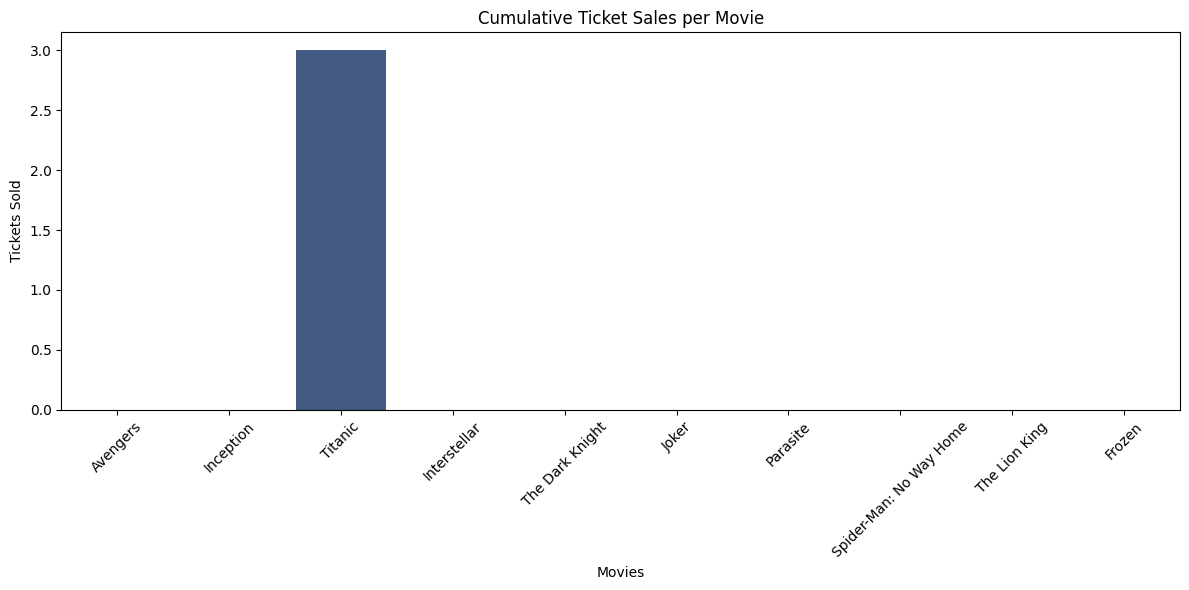

Thank you for using the Movie Ticket Booking System!


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import json
import os

# Define the movies with their available seats, poster paths, and showtimes
movies = {
    "Avengers": {
        "total_seats": 100,
        "booked_seats": 0,
        "poster_path": "/content/avengers.jpg",  # Path to uploaded image
        "showtime": ["5:00 PM"]
    },
    "Inception": {
        "total_seats": 80,
        "booked_seats": 0,
        "poster_path": "/content/inception.jpg",  # Path to uploaded image
        "showtime": ["8:00 PM"]
    },
    "Titanic": {
        "total_seats": 120,
        "booked_seats": 0,
        "poster_path": "/content/titanic.jpg",  # Path to uploaded image
        "showtime": ["6:00 PM"]
    },
    "Interstellar": {
        "total_seats": 90,
        "booked_seats": 0,
        "poster_path": "/content/interstellar.jpg",  # Path to uploaded image
        "showtime": ["7:30 PM"]
    },
    "The Dark Knight": {
        "total_seats": 110,
        "booked_seats": 0,
        "poster_path": "/content/the dark knight.jpg",  # Path to uploaded image
        "showtime": ["9:00 PM"]
    },
    "Joker": {
        "total_seats": 75,
        "booked_seats": 0,
        "poster_path": "/content/joker.jpeg",  # Path to uploaded image
        "showtime": ["4:30 PM"]
    },
    "Parasite": {
        "total_seats": 85,
        "booked_seats": 0,
        "poster_path": "/content/parasite.jpg",  # Path to uploaded image
        "showtime": ["3:00 PM"]
    },
    "Spider-Man: No Way Home": {
        "total_seats": 95,
        "booked_seats": 0,
        "poster_path": "/content/spider-man.jpeg",  # Path to uploaded image
        "showtime": ["7:00 PM"]
    },
    "The Lion King": {
        "total_seats": 130,
        "booked_seats": 0,
        "poster_path": "/content/lion king.jpeg",  # Path to uploaded image
        "showtime": ["2:00 PM"]
    },
    "Frozen": {
        "total_seats": 140,
        "booked_seats": 0,
        "poster_path": "/content/frozen.jpeg",  # Path to uploaded image
        "showtime": ["12:30 PM"]
    }
}

# Initialize cumulative sales dictionary
cumulative_sales = {movie: 0 for movie in movies.keys()}

# Load cumulative sales from a file
def load_sales():
    if os.path.exists("ticket_sales.json"):
        with open("ticket_sales.json", "r") as file:
            global cumulative_sales
            cumulative_sales = json.load(file)

# Save cumulative sales to a file
def save_sales():
    with open("ticket_sales.json", "w") as file:
        json.dump(cumulative_sales, file)

# Define functions
def display_movies():
    print("\nAvailable Movies:")
    for movie, details in movies.items():
        available_seats = details["total_seats"] - details["booked_seats"]
        print(f"{movie} (Available Seats: {available_seats})")

def book_ticket():
    display_movies()

    movie_title = input("Enter the movie title you want to book: ")
    if movie_title not in movies:
        print("Movie not available. Please try again.")
        return

    customer_name = input("Enter your name: ")
    number_of_tickets = int(input("Enter number of tickets: "))

    # Check for availability
    if movies[movie_title]['booked_seats'] + number_of_tickets > movies[movie_title]['total_seats']:
        print("Not enough available seats.")
        return

    # Update booked seats and cumulative sales
    movies[movie_title]['booked_seats'] += number_of_tickets
    cumulative_sales[movie_title] += number_of_tickets

    # Display available showtime
    available_showtimes = movies[movie_title]["showtime"]
    print(f"Available showtimes for {movie_title}: {', '.join(available_showtimes)}")

    # Input showtime from user
    showtime = input("Enter showtime (choose from the above): ")
    if showtime not in available_showtimes:
        print("Invalid showtime selected. Please try again.")
        return

    available_seats_after_booking = movies[movie_title]['total_seats'] - movies[movie_title]['booked_seats']
    print(f"Booking confirmed for {customer_name}. {number_of_tickets} tickets for {movie_title} at {showtime}.")
    print(f"Available seats after booking: {available_seats_after_booking}")

    # Save cumulative sales to a file
    save_sales()

    # Display the movie poster
    display_movie_poster(movie_title)

def display_sales_report():
    print("\nTicket Sales Report:")
    total_tickets_sold = 0
    for movie, tickets_sold in cumulative_sales.items():
        print(f"{movie}: {tickets_sold} tickets sold (Cumulative: {tickets_sold})")
        total_tickets_sold += tickets_sold
    print(f"Total tickets sold: {total_tickets_sold}\n")

def visualize_ticket_sales():
    if not cumulative_sales:
        print("No tickets sold yet.")
        return

    # Create bar plot using Seaborn for cumulative sales
    movies_list = list(cumulative_sales.keys())
    tickets_list = list(cumulative_sales.values())

    plt.figure(figsize=(12, 6))

    # Bar plot for cumulative sales
    sns.barplot(x=movies_list, y=tickets_list, hue=movies_list, palette='viridis', legend=False)

    plt.title('Cumulative Ticket Sales per Movie')
    plt.xlabel('Movies')
    plt.ylabel('Tickets Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def display_movie_poster(movie_title):
    try:
        poster_path = movies[movie_title]["poster_path"]
        print(f"Loading poster from: {poster_path}")  # Debugging line
        img = Image.open(poster_path)

        # Display the image using matplotlib
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(movie_title)  # Show the movie title
        plt.show()
    except Exception as e:
        print(f"Failed to load poster for {movie_title}. Error: {e}")

def main():
    load_sales()  # Load cumulative sales from file
    book_ticket()  # Allow the user to book a ticket
    display_sales_report()  # Show the ticket sales report
    visualize_ticket_sales()  # Visualize the cumulative ticket sales

    print("Thank you for using the Movie Ticket Booking System!")

# Run the main function
main()
